# Mengolah Dataset ORL Untuk Prediksi ORL menggunakan metode PCA Manual

In [191]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Representasi Data Citra

Total Citra :  400
Dimensi 1 Citra :  (112, 92)


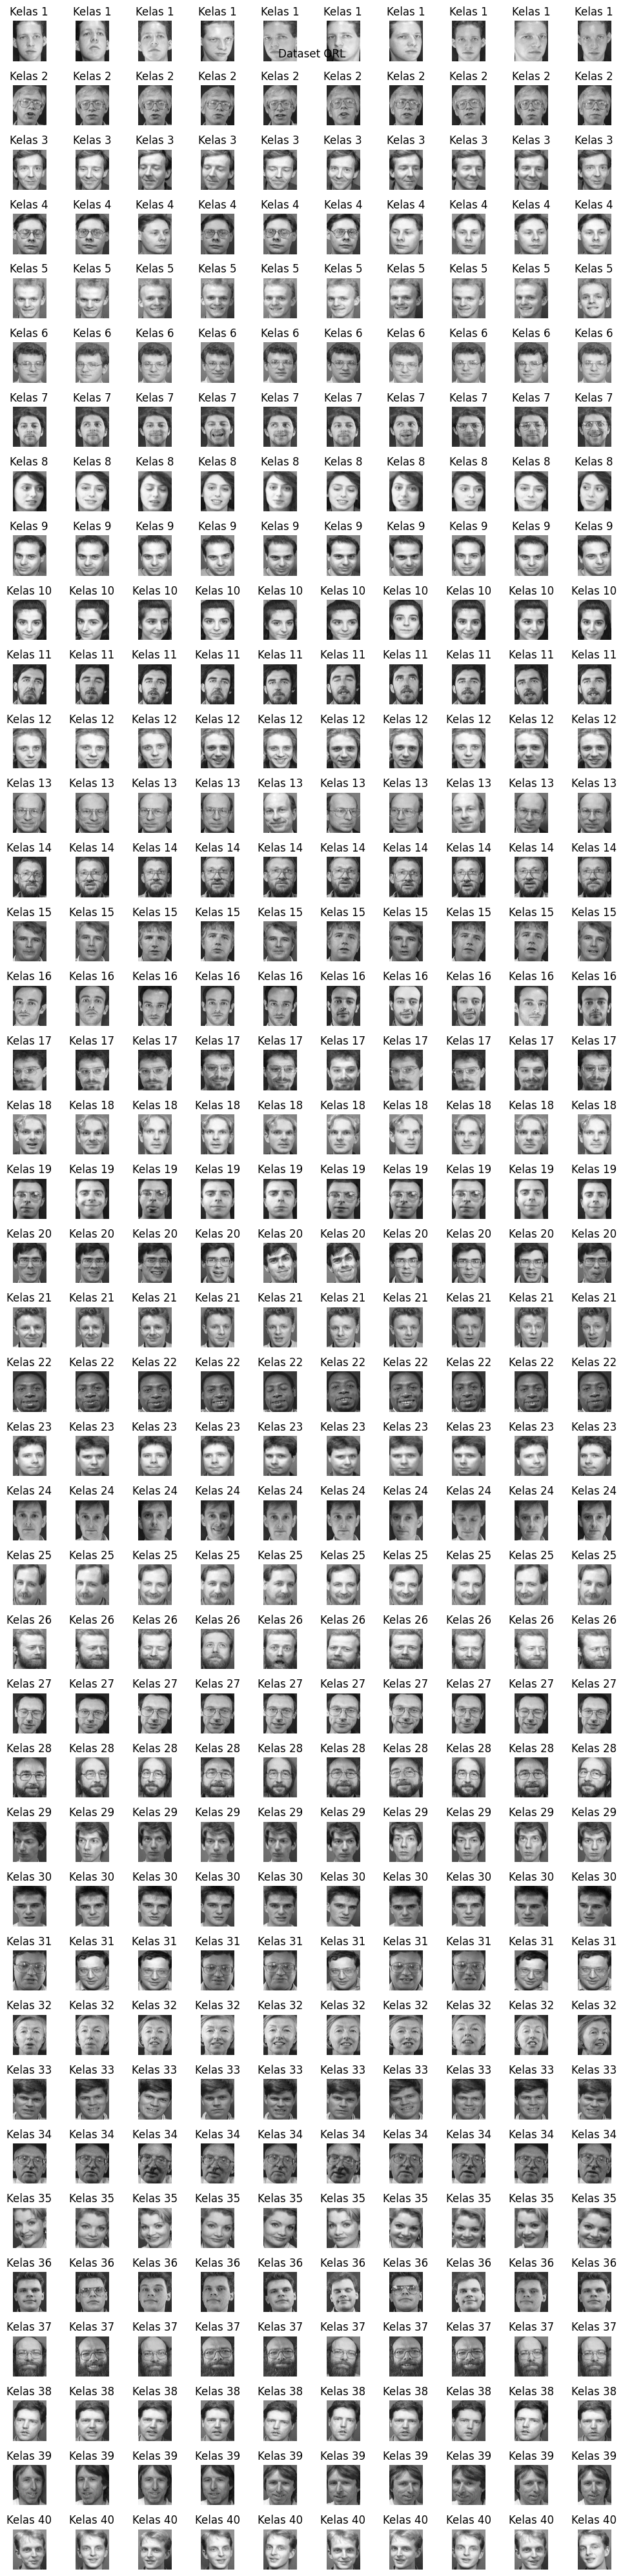

In [197]:
datasetORL = ()

for i in range(1, 41):
    contents = os.listdir('/Users/iamapinn/Developer/UTS Pengolahan CITRA/ORL/'+str(i))
    for image_file in contents:
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image = cv2.imread('/Users/iamapinn/Developer/UTS Pengolahan CITRA/ORL/'+str(i)+'/'+image_file, cv2.IMREAD_GRAYSCALE)
            datasetORL += (image,)

print("Total Citra : ", len(datasetORL)) 
print("Dimensi 1 Citra : ", datasetORL[0].shape)


fig, ax = plt.subplots(40, 10, figsize=(10, 40))
for i in range(40):
    for j in range(10):
        ax[i, j].imshow(datasetORL[i*10+j], cmap='gray')
        ax[i, j].set_title('Kelas '+str(i+1))
        ax[i, j].axis('off')
        
plt.tight_layout()
fig.suptitle('Dataset ORL')
plt.show()

### Perubahan Dimensi Citra

In [199]:
# datasetORL dibuat 1 dimensi Model Stack Terbalik
datasetORL = np.array(datasetORL)
datasetORL = datasetORL.reshape((400, 10304))

print("Dimensi Baru 1 Citra : ", datasetORL[0].shape)
print("Dimensi Baru Semua Citra : ", datasetORL.shape)

Dimensi Baru 1 Citra :  (10304,)
Dimensi Baru Semua Citra :  (400, 10304)


## Pemisahan Citra Training dan Testing

In [190]:
JumlahTraing = 0.6

# Split Data Training dan Data Testing
jumlahDataTraining = int(len(datasetORL) * JumlahTraing)
jumlahDataTesting = len(datasetORL) - jumlahDataTraining

# Data Training
dataTraining = datasetORL[:jumlahDataTraining]
print("Dimensi Data Training : ", dataTraining.shape)
print("Data Training : ", dataTraining)
print()
# Data Testing
dataTesting = datasetORL[jumlahDataTraining:]
print("Dimensi Data Testing : ", dataTesting.shape)
print("Data Testing : ", dataTesting)

Dimensi Data Training :  (240, 10304)
Data Training :  [[49 39 31 ... 41 39 37]
 [41 40 41 ... 44 43 43]
 [37 46 49 ... 38 38 37]
 ...
 [43 42 41 ... 61 29 47]
 [37 35 35 ... 58 57 57]
 [31 37 42 ... 59 59 58]]

Dimensi Data Testing :  (160, 10304)
Data Testing :  [[123 123 123 ... 100  99  97]
 [125 125 123 ...  73  76  99]
 [121 121 121 ... 100 102 103]
 ...
 [127 127 127 ...  87  87  86]
 [123 122 121 ...  40  40  39]
 [119 119 119 ...  92  91  90]]


## PCA Process

### Hitung Mean

In [201]:
mean = np.mean(dataTraining, axis=0)
print("Dimensi Mean : ", mean.shape)
print("Mean : ", mean)

Dimensi Mean :  (10304,)
Mean :  [87.46666667 87.62916667 87.61666667 ... 68.9625     67.22083333
 67.66666667]


### Hitung Zero Mean

In [202]:
# Matrix Data Training - Mean

zeroMean = dataTraining - mean

print('Dimensi Zero Mean :', zeroMean.shape)
print("Zero Mean : ", zeroMean)


Dimensi Zero Mean : (240, 10304)
Zero Mean :  [[-38.46666667 -48.62916667 -56.61666667 ... -27.9625     -28.22083333
  -30.66666667]
 [-46.46666667 -47.62916667 -46.61666667 ... -24.9625     -24.22083333
  -24.66666667]
 [-50.46666667 -41.62916667 -38.61666667 ... -30.9625     -29.22083333
  -30.66666667]
 ...
 [-44.46666667 -45.62916667 -46.61666667 ...  -7.9625     -38.22083333
  -20.66666667]
 [-50.46666667 -52.62916667 -52.61666667 ... -10.9625     -10.22083333
  -10.66666667]
 [-56.46666667 -50.62916667 -45.61666667 ...  -9.9625      -8.22083333
   -9.66666667]]


### Hitung Covariance

In [203]:
# covarianceMatrix = np.cov(zeroMean)

covarianceMatrix = np.dot(zeroMean, zeroMean.T) / dataTraining.shape[0]-1

print('Dimensi Covariance :', covarianceMatrix.shape)
print('Covariance :', covarianceMatrix)

Dimensi Covariance : (240, 240)
Covariance : [[ 88067.46364337  70382.27520587  40323.48360865 ... -11105.84585315
   16288.95008435  13125.08914685]
 [ 70382.27520587 108982.08676837  52174.31183782 ... -17678.40095732
    5886.24081351   2060.57154268]
 [ 40323.48360865  52174.31183782  70476.52857393 ...  -5732.32172121
   -7113.05911704  -7292.35338788]
 ...
 [-11105.84585315 -17678.40095732  -5732.32172121 ...  57698.27798365
   32287.79475448  32628.18381698]
 [ 16288.95008435   5886.24081351  -7113.05911704 ...  32287.79475448
   72396.01985865  56279.80475448]
 [ 13125.08914685   2060.57154268  -7292.35338788 ...  32628.18381698
   56279.80475448  66976.51465032]]


### Eigenvalue dan Eigenvector

In [205]:
from numpy import linalg

# This computes the eigenvalues and eigenvectors
# Sumber : https://github.com/launchcode01dl/mathematics-for-machine-learning-coursera/blob/master/course3%20-%20principle%20component%20analysis/week1/numpy_tutorial.ipynb
eigenvalues, eigenvectors = linalg.eig(covarianceMatrix)

In [227]:
# Eigenvector
print('Dimensi Eigenvector :', eigenvectors.shape)
print('Eigenvector :', eigenvectors)
print()

# Eigenvalue
print('Dimensi Eigenvalue :', eigenvalues.shape)
print('Eigenvalue :', eigenvalues)


Dimensi Eigenvector : (240, 240)
Eigenvector : [[ 0.10146737  0.03336881 -0.15521939 ...  0.02634227  0.02321773
  -0.00037103]
 [ 0.092572    0.08149679 -0.13908551 ... -0.01548381 -0.03265073
   0.00549391]
 [ 0.08610532  0.05137679 -0.0747775  ...  0.04197606  0.03874416
  -0.0281071 ]
 ...
 [-0.05878471 -0.02781461 -0.07035085 ...  0.03711473  0.05527033
   0.0379228 ]
 [-0.05977411 -0.04038742 -0.15595586 ...  0.10002656  0.00342572
  -0.00680782]
 [-0.05054167 -0.05072906 -0.13176156 ...  0.0011086   0.02310941
   0.00496308]]

Dimensi Eigenvalue : (240,)
Eigenvalue : [ 2.61370973e+06  2.13309905e+06  1.11251856e+06  1.00719869e+06
  7.69957961e+05  5.24158230e+05  4.71058059e+05  4.02371130e+05
  3.68017607e+05  3.16090403e+05  2.59506816e+05  2.25468662e+05
  2.16959340e+05  1.80368897e+05  1.67217680e+05  1.56359173e+05
  1.45985339e+05  1.42033019e+05  1.24804526e+05  1.20492112e+05
  1.14345365e+05  1.04630555e+05  9.85607118e+04  9.75175348e+04
  8.72185664e+04  8.29995042e

In [209]:
# Eigen vector after Sorting
sortedEigenVectors = eigenvectors[:, eigenvalues.argsort()[::-1]]
print('Dimensi Sorted Eigenvector :', sortedEigenVectors.shape)
print('Sorted Eigenvector :', sortedEigenVectors)

Dimensi Sorted Eigenvector : (240, 240)
Sorted Eigenvector : [[ 0.10146737  0.03336881 -0.15521939 ... -0.00420472 -0.03014719
   0.06454972]
 [ 0.092572    0.08149679 -0.13908551 ... -0.00981738  0.02234904
   0.06454972]
 [ 0.08610532  0.05137679 -0.0747775  ...  0.00819013 -0.00708273
   0.06454972]
 ...
 [-0.05878471 -0.02781461 -0.07035085 ... -0.01263151 -0.00121891
   0.06454972]
 [-0.05977411 -0.04038742 -0.15595586 ...  0.00955273 -0.02316454
   0.06454972]
 [-0.05054167 -0.05072906 -0.13176156 ...  0.00530168  0.02894789
   0.06454972]]


### Menghitung Proyeksi dan Bobot

In [221]:
# Proyeksi
proyeksi = np.dot(zeroMean.T, sortedEigenVectors).T
print('Dimensi Proyeksi :', proyeksi.shape)
print('Proyeksi :', proyeksi)
print()

# Bobot
bobot = np.dot(dataTraining, proyeksi.T)
print('Dimensi Bobot :', bobot.shape)
print('Bobot :', bobot)

Dimensi Proyeksi : (240, 10304)
Proyeksi : [[-1.59999675e+02 -1.57954548e+02 -1.60846644e+02 ... -6.58471668e+01
  -6.04967899e+01 -9.21525906e+01]
 [ 3.56252153e+02  3.56603350e+02  3.51170649e+02 ... -1.33665470e+02
  -9.55625079e+01 -8.59515361e+01]
 [ 3.17239484e+02  3.16777777e+02  3.19751552e+02 ...  9.59996687e+01
   1.07078169e+02  1.07909444e+02]
 ...
 [-4.48270721e-01  7.03916209e-01  9.80673219e-01 ...  2.05132366e+00
   3.74125352e+00  3.71641640e+00]
 [-4.68370107e+00 -2.19937885e+00  5.24124841e-01 ... -8.40486275e-01
   4.45868807e-01  1.56734974e+00]
 [ 1.70530257e-13  1.84741111e-13  2.55795385e-13 ... -4.97379915e-13
  -4.68958206e-13 -8.81072992e-13]]

Dimensi Bobot : (240, 240)
Bobot : [[ 1.95792073e+08  2.11568094e+08 -5.44764995e+07 ...  3.34127467e+04
  -1.23402761e+05 -1.05662951e-08]
 [ 1.90212094e+08  2.36206915e+08 -5.01686811e+07 ...  3.03624265e+04
  -9.84291939e+04 -1.48853251e-08]
 [ 1.86155607e+08  2.20787165e+08 -3.29981552e+07 ...  4.01489960e+04
  -1.

## Prediksi Citra